In [1]:
import sys
import os
import json
from shapely.geometry import shape
import numpy as np
from dask.distributed import Client, LocalCluster
from pystac_client import Client as StacClient
import stackstac
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
cluster = LocalCluster(
    n_workers=4,             # safe for 15 GB RAM
    threads_per_worker=1,    # raster operations run best single-threaded
    memory_limit="6GB"       # 3 workers × 4GB = 12GB used
)

client = Client(cluster)
cluster


LocalCluster(6779ce61, 'tcp://127.0.0.1:45485', workers=4, threads=4, memory=22.35 GiB)

2025-12-08 20:38:47,648 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:34387'.


In [ ]:
os.getcwd()

In [3]:
# Add the folder containing WQI_utils.py
sys.path.append(os.path.abspath("../utils"))

## 2 Import the main functions
from wqi_utils import wqi
from plots_utils import plot_indices_analysis

Found 50 Sentinel-2 scenes.


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


Stack mosaic shape: (28, 5, 9969, 24335)


2025-12-08 18:06:42,210 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 4.50 GiB -- Worker memory limit: 5.59 GiB
2025-12-08 18:06:42,314 - distributed.worker.memory - WARNING - Worker is at 61% memory usage. Resuming worker. Process memory: 3.45 GiB -- Worker memory limit: 5.59 GiB
2025-12-08 18:12:23,496 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 4.54 GiB -- Worker memory limit: 5.59 GiB
2025-12-08 18:12:23,576 - distributed.worker.memory - WARNING - Worker is at 64% memory usage. Resuming worker. Process memory: 3.60 GiB -- Worker memory limit: 5.59 GiB


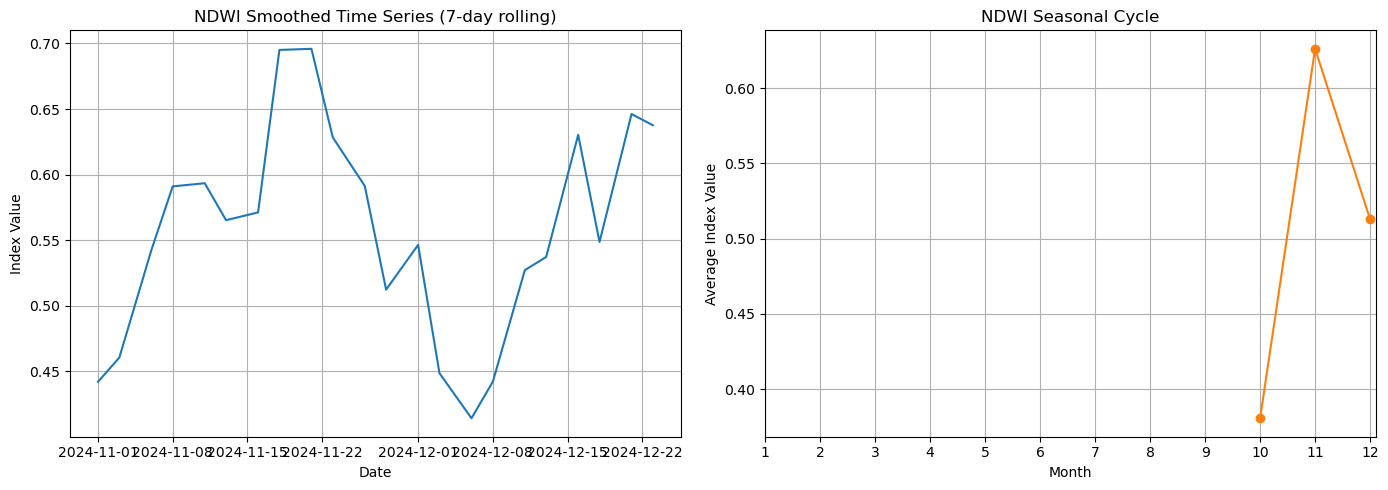

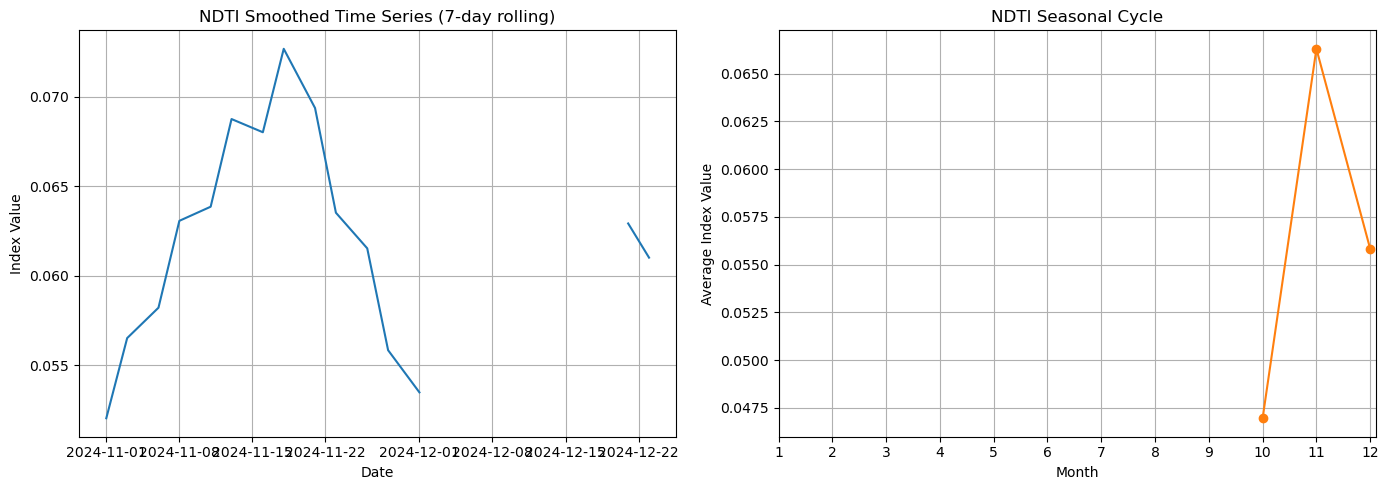

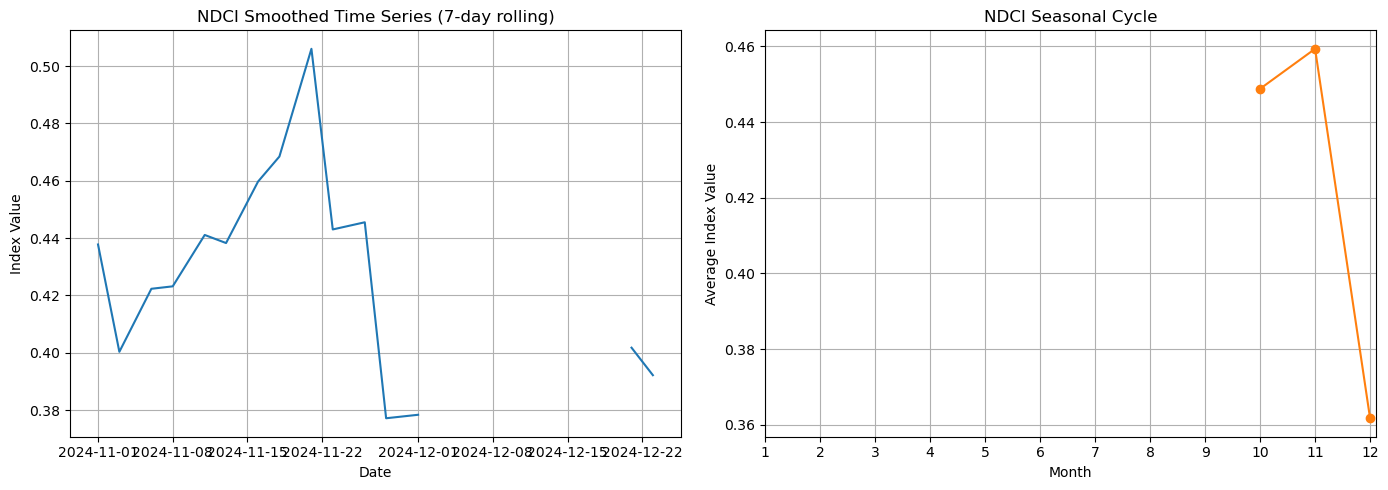

2025-12-08 20:38:47,640 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/worker.py", line 1250, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/distributed/utils_comm.py", line 461, in retry_operation
    return await retry(
           ^^^^^^^^^^^^
  File "/opt/conda/envs/geog313-final-project/lib/python3.11/site-

In [4]:
bbox = [-82.8, 27.5, -82.2, 28.2]

result = wqi(
    bbox=bbox,
    start_date="2019-01-01",
    end_date="2024-12-31",
    max_items=50
)

plot_indices_analysis(result["indices"])

In [ ]:
bbox = [-82.8, 27.5, -82.2, 28.2]

result = wqi(
    bbox=bbox,
    start_date="2019-01-01",
    end_date="2024-12-31",
    max_items = 30
)

ndwi = result["indices"]["NDWI"]
ndti = result["indices"]["NDTI"]
ndci = result["indices"]["NDCI"]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ndci.time.values, ndci.values, label="NDCI", color="blue")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("NDCI Time Series")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
result['stack']


In [ ]:
print(ndci)
print(ndwi)
print(ndti)


In [ ]:
# Extract individual DataArrays from the dictionary
ndci = indices['NDCI']
ndwi = indices['NDWI']
ndti = indices['NDTI']

# Plot NDCI as an example
plt.figure(figsize=(12, 6))
plt.plot(ndci.time, ndci.values, label="NDCI", color="blue")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.title("NDCI Time Series")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plot_time_series(ndci, "NDCI")

plt.figure(figsize=(12,6))
plot_seasonal_cycle(ndci, "NDCI")

In [ ]:
# Compute NDCI series
ndci_series = result["indices"]["NDCI"].compute()  # get actual values
time = result["indices"]["NDCI"].time.values      # get time coordinates

plt.figure(figsize=(10,5))
plt.plot(time, ndci_series, marker="o", linestyle="--", color="green")
plt.title("NDCI Time Series")
plt.xlabel("Time")
plt.ylabel("Mean NDCI")
plt.grid(True)
plt.show()


In [ ]:
wqi_time_series(
    bbox=bbox,
    start_date=START_DATE,
    end_date=END_DATE,
    filter_clouds=True,          
)

In [ ]:
main(
    bbox=bbox,
    start_date=START_DATE,
    end_date=END_DATE,
    filter_clouds=False,
)

In [ ]:
from pystac_client import Client

client = Client.open("https://earth-search.aws.element84.com/v1")
items = client.search(
    collections=["sentinel-2-l2a"],
    bbox=bbox,
    datetime=f"{START_DATE}/{END_DATE}",
    max_items=500
).item_collection()

print("Number of items found:", len(items))


In [ ]:
wqi_dict = wqi(
    bbox=bbox,
    start_date=START_DATE,
    end_date=END_DATE,
    filter_clouds=True,          
)